# Домашняя работа №1

In [52]:
import numpy as np
import pylab as pl
import pandas as pd
import warnings
import math

from matplotlib import pyplot as plt
from scipy import linalg


warnings.filterwarnings("ignore")

## Задание 1

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z. 

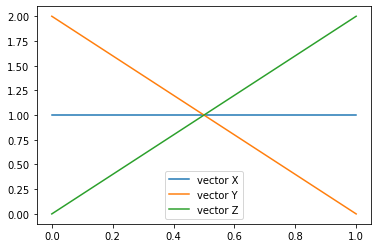

In [41]:
x = np.array([1,1])
y = np.array([2,0])
z = np.array([0,2])

plt.plot(x)
plt.plot(y)
plt.plot(z)

plt.legend(['vector X', 'vector Y', 'vector Z'])

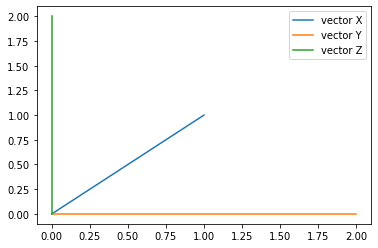

In [49]:
# Изобразите с помощью matplotlib. Дошло, вектор выходит из 0 и приходит в указанную точку
x = np.array([1,1])
y = np.array([2,0])
z = np.array([0,2])

fig, ax = plt.subplots()

for line in (x,y,z):
    a = [0,line[0]]
    b = [0,line[1]]
    ax.plot(a,b)

ax.legend(['vector X', 'vector Y', 'vector Z'])

[1 1] [4 0] [0 6] [5 7]


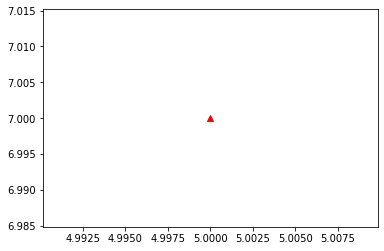

In [104]:
# Изобразите точку x + 2y + 3z

x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])


point = x + 2*y + 3*z
print(x, y*2, z*3, point)

plt.scatter(point[0], point[1], c='red', marker='^')

plt.show()

In [62]:
# Найдите угол между векторами x, y и x, z
cos_angle = np.dot(x, y) / linalg.norm(x) / linalg.norm(y)
print ('Косинус угла между x и y:', cos_angle)
print (f'Сам угол: {round(math.degrees(np.arccos(cos_angle)),1)} градусов')

cos_angle = np.dot(x, z) / linalg.norm(x) / linalg.norm(z)
print ('Косинус угла между x и z:', cos_angle)
print (f'Сам угол: {round(math.degrees(np.arccos(cos_angle)),1)} градусов')

Косинус угла между x и y: 0.7071067811865475
Сам угол: 45.0 градусов
Косинус угла между x и z: 0.7071067811865475
Сам угол: 45.0 градусов


## Задание 2

Загрузите модель человека. Найдите расстояние от правой кисти до позвоночника

In [63]:
ns = ['type', 'x', 'y', 'z']
# read points for joints
dfJointsVertexes = pd.read_csv('joints.txt', sep=' ', names = ns)
axis_sort = 'x' 
df = dfJointsVertexes.sort_values(by=[axis_sort])

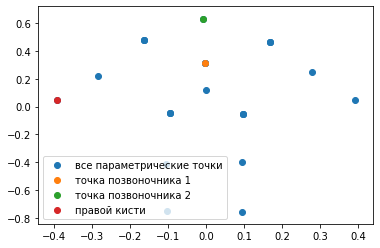

In [92]:
plt.scatter(df.x, df.y)

plt.scatter(df.x[9], df.y[9])
plt.scatter(df.x[11], df.y[11])
plt.scatter(df.x[21], df.y[21])
plt.legend(['все параметрические точки', 'точка позвоночника 1','точка позвоночника 2', 'правой кисти'])

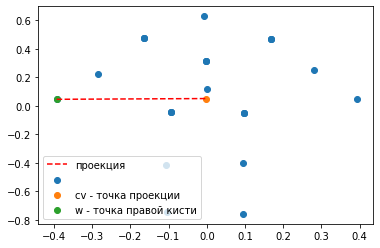

In [93]:
# вектор v - вектор позвоночника (составлен как разность одного вектора из другого)
v = np.array([df.x[9] - df.x[11], df.y[9] - df.y[11]])
# вектор w - вектор правой кисти
w = np.array([df.x[21],df.y[21]])

# строим проекцию данной точки w на вектор v: cv
cv = np.array(df.x[9], df.y[9]) + (np.dot(w,v))/np.dot(v,np.transpose(v))*v

# линия между v и cv
plt.plot([w[0],cv[0]],[w[1],cv[1]],'r--',linewidth=1.5)
plt.scatter(df.x, df.y)
plt.scatter(cv[0], cv[1])
plt.scatter(w[0], w[1])
plt.legend(['проекция', '', 'cv - точка проекции', 'w - точка правой кисти'])

In [94]:
# Расстояние от точки локтя до позвоночника - модуль вектора, образованного разностью двух точек: cv и w.
linalg.norm(cv - w)

0.38940416891982127

# Задание 3

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy). Для матрицы 3x3 можно посмотреть на корни характеристического многочлена, посчитанные в numpy.

In [95]:
m1 = np.array([[2, 2],
               [1, 3]])

m2 = np.array([[4, 1, -1],
               [1, 4, -1],
               [-1, -1, 4]])

In [101]:
e_vals, e_vecs = np.linalg.eig(m1)
print ("Матрица m1:\n", m1)
print ("Собственные числа:\n", e_vals)
print ("Собственные векторы:\n", e_vecs)

Матрица m1:
 [[2 2]
 [1 3]]
Собственные числа:
 [1. 4.]
Собственные векторы:
 [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]


In [102]:
e_vals, e_vecs = np.linalg.eig(m2)
print ("Матрица m2:\n", m2)
print ("Собственные числа:\n", e_vals)
print ("Собственные векторы:\n", e_vecs)

Матрица m2:
 [[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]
Собственные числа:
 [3. 6. 3.]
Собственные векторы:
 [[-0.81649658  0.57735027 -0.27658128]
 [ 0.40824829  0.57735027  0.8035929 ]
 [-0.40824829 -0.57735027  0.52701162]]
